<a href="https://colab.research.google.com/github/LiamSwick/Data-Science-Sandbox/blob/main/K_Means_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

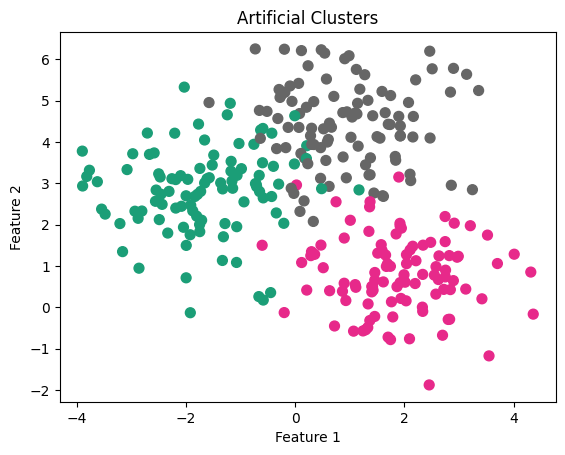

In [44]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2_r')
plt.title("Artificial Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

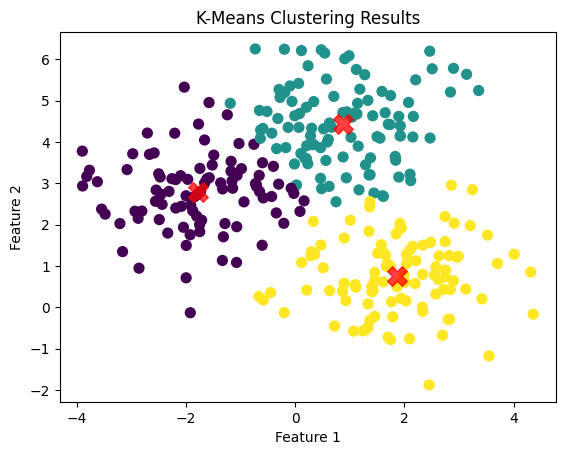

In [45]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [46]:
# prompt: get the kmeans accuracy

from sklearn.metrics import accuracy_score
import numpy as np

def find_cluster_mapping(true_labels, predicted_labels, n_clusters):
    mapping = {}
    for i in range(n_clusters):
        # Find the true labels that belong to the current predicted cluster i
        true_labels_in_cluster_i = true_labels[predicted_labels == i]
        if len(true_labels_in_cluster_i) > 0:
            # Find the most frequent true label in this cluster
            most_frequent_true_label = np.bincount(true_labels_in_cluster_i).argmax()
            mapping[i] = most_frequent_true_label
    return mapping

mapping = find_cluster_mapping(y, labels, 3)

# Apply the mapping to the predicted labels
mapped_predicted_labels = np.array([mapping.get(label, -1) for label in labels]) # Use -1 for unmapped

# Filter out unmapped points if any (though with 3 clusters and 3 centers, mapping should be complete)
valid_indices = mapped_predicted_labels != -1

# Calculate accuracy only on valid points
accuracy = accuracy_score(y[valid_indices], mapped_predicted_labels[valid_indices])

print(f"K-Means Accuracy (after mapping): {accuracy:.4f}")


K-Means Accuracy (after mapping): 0.9167
